In [3]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

In [7]:
data = pd.read_csv('classification_data_HWK1/classificationC.train',sep="\t", names=["a","b","c"])
test = pd.read_csv('classification_data_HWK1/classificationC.test',sep="\t", names=["a","b","c"])

### LDA

In [19]:
pi=data["c"].mean()
mu_0=(data[data["c"]==0][["a","b"]].mean())
mu_1=(data[data["c"]==1][["a","b"]].mean())
sigma=data[["a","b"]].cov().multiply((len(data)-1)/len(data))

Classification error on the training set is :  0.09
Classification error on the test set is :  0.06866666666666667


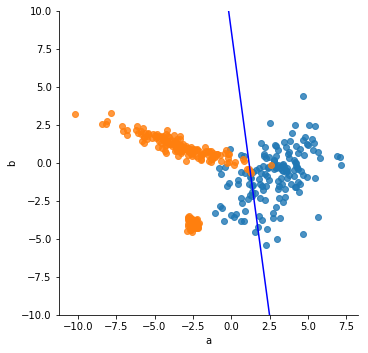

In [20]:
sns.lmplot( x='a', y='b', data = data, fit_reg=False, hue='c', legend=False)
A=np.linalg.inv(sigma)
e_1=np.dot(A,np.subtract(mu_0,mu_1))
alpha=math.log2(pi/(1-pi))+0.5*np.dot(mu_0,np.dot(A,mu_0))-0.5*np.dot(mu_1,np.dot(A,mu_1))
def line(x):
    return -(e_1[0]/e_1[1])*x + alpha/e_1[1]

xRange = ( data['a'].min(), data['a'].max() )
plt.plot( np.arange( *xRange ),line(np.arange( *xRange)), linestyle='solid', color='b')
plt.ylim((-10,10))
def prediction( x ):
    if np.sign(-(e_1[0]/e_1[1]))*(x['b'] - line ( x['a'] )) > 0:
        return 1
    return 0

test['MLE'] = test.apply(prediction, axis=1)
data['MLE'] = data.apply(prediction, axis=1)
train_error =  np.sum( data['MLE'] != data['c'] )/len(data)
test_error =  np.sum( test['MLE'] != test['c'] )/len(test)
print("Classification error on the training set is : ", train_error )
print("Classification error on the test set is : ", test_error )

### Logistic Regression

In [21]:
data['d'] = pd.Series(np.ones(len(data)))
X = data[["a","b","d"]]

def sigmoid(w):
    return 1/(1+np.exp(-np.dot(X,w)))
def S(w):
    return np.diag(np.multiply(sigmoid(w),sigmoid(-w)))
# def grad(w):
#     grad=np.dot(data["c"]-sigmoid(w),X)
#     return grad
def hess(w):
    hess=np.dot(np.transpose(X),np.dot(S(w),X))
    return np.linalg.pinv(hess)
def z(w):
    return np.dot(X,w)+np.dot(np.linalg.pinv(S(w)),data['c']-sigmoid(w))

In [36]:
w_new=np.ones(3)*100
w=np.random.rand(3)
cpt=0
while((np.linalg.det(hess(w_new))>1e-5)):
    tmp=w_new
    w_new=np.dot(hess(w),np.dot(np.dot(S(w),z(w)),X))
    w=tmp
    cpt+=1

print(w)
print(w_new)
print(cpt)

[-7.53754659 -2.00404211 -0.5054738 ]
[-63598.0488249  -66124.24550764 -62364.63015057]
2


Classification error on the training set is :  0.06
Classification error on the test set is :  0.052


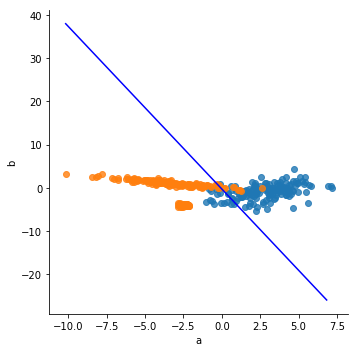

In [38]:
sns.lmplot( x='a', y='b', data = data, fit_reg=False, hue='c', legend=False)
def logline(x):
    return -(w[0]/w[1])*x - w[2]/w[1]

plt.plot( np.arange( *xRange ),logline(np.arange( *xRange)), linestyle='solid', color='b')


def prediction( x ):
    if x['b'] - logline ( x['a'] ) < 0:
        return 1
    return 0

test['logistic Reg'] = test.apply(prediction, axis=1)
data['logistic Reg'] = data.apply(prediction, axis=1)
train_error =  np.sum( data['logistic Reg'] != data['c'] )/len(data)
test_error =  np.sum( test['logistic Reg'] != test['c'] )/len(test)
print("Classification error on the training set is : ", train_error )
print("Classification error on the test set is : ", test_error )

### Linear Regression

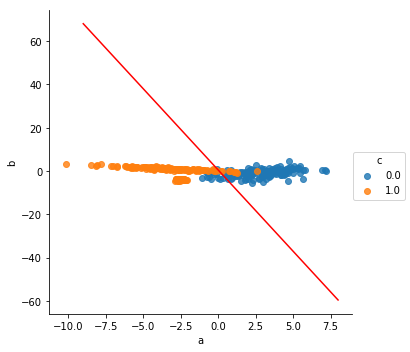

In [41]:
beta = np.dot(np.dot(X,np.linalg.inv(np.dot(X.T,X))).T,data[["c"]])
s=np.linalg.norm(data[['c']]-np.dot(data[["a","b","d"]],beta))/len(data)

sns.lmplot( x='a', y='b', data = data, fit_reg=False, hue='c')

a=-beta[0]/beta[1]
b=-(beta[2]-0.5)/beta[1]
def line(x):
    return a*x + b

plt.plot(np.arange(-9,9),line(np.arange(-9,9)), linestyle='solid', color='red')

### QDA

In [42]:
import sympy
data[["a","b"]].cov().multiply((len(data)-1)/len(data))
sigma0 = np.linalg.inv(data[data['c']==0][ [ "a", "b" ] ].cov().multiply( ( len(data) - 1 ) / len(data) ))
sigma1 = np.linalg.inv(data[data['c']==1][ [ "a", "b" ] ].cov().multiply( ( len(data) - 1 ) / len(data) ))
sigma  = -sigma0+sigma1
a = sigma[0,0]
c = sigma[1,1]
b = sigma[0,1]+sigma[1,0]
d,e = 2*np.dot(sigma0,mu_0) - 2*np.dot(sigma1,mu_1)
f = np.dot(np.dot(sigma1,mu_1),mu_1)-np.dot(np.dot(sigma0,mu_0),mu_0)-2*np.log((pi*np.linalg.det(sigma1))/((1-pi)*np.linalg.det(sigma0)))

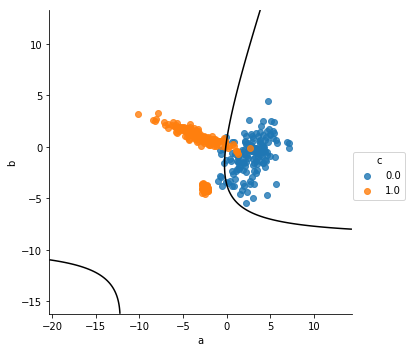

In [43]:
yRange = ( data['b'].min()*3, data['b'].max()*3 )

x = np.linspace(xRange[0]*2, xRange[1] *2, 400)
y = np.linspace(*yRange, 400)
x, y = np.meshgrid(x, y)
def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

sns.lmplot( x='a', y='b', data = data, fit_reg=False, hue='c')
plt.contour(x, y,(a*x**2 + b*x*y + c*y**2 + d*x + e*y + f), [0], colors='k')
